https://statkclee.github.io/nlp2/nlp-text-viz.html

Lexical diversity

In [2]:
import nltk
nltk.download('inaugural')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\82107\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\inaugural.zip.


True

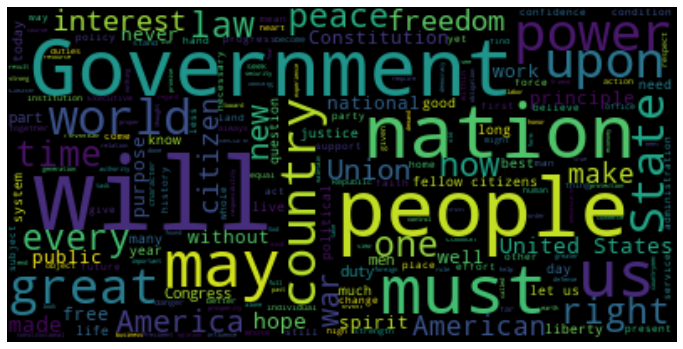

In [3]:
from nltk.corpus import inaugural
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = inaugural.raw()

wordcloud = WordCloud(max_font_size=60).generate(text)

plt.figure(figsize=(12,9))

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Lexical dispersion plot

In [5]:
nltk.download('genesis')
nltk.download('nps_chat')
nltk.download('webtext')
nltk.download('treebank')

[nltk_data] Downloading package genesis to
[nltk_data]     C:\Users\82107\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\genesis.zip.
[nltk_data] Downloading package nps_chat to
[nltk_data]     C:\Users\82107\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\nps_chat.zip.
[nltk_data] Downloading package webtext to
[nltk_data]     C:\Users\82107\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\webtext.zip.
[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\82107\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\treebank.zip.


True

In [8]:
import nltk
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\82107\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\gutenberg.zip.


True

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


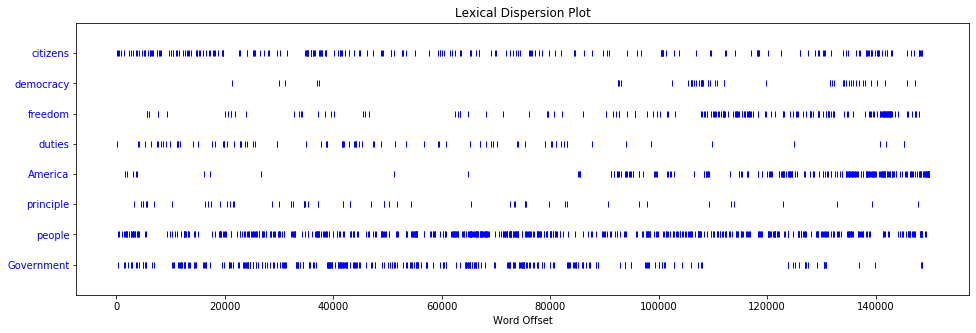

In [9]:
import nltk
from nltk.book import text4 as inaugural_speeches

plt.figure(figsize=(16,5))
topics = ['citizens', 'democracy', 'freedom', 'duties', 'America','principle','people', 'Government']
inaugural_speeches.dispersion_plot(topics)

In [10]:
nltk.download('brown')

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\82107\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.


True

In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\82107\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [13]:
from nltk.corpus import brown
from nltk.corpus import stopwords

topics = ['government', 'news', 'religion', 'adventure', 'hobbies']

stop_words = set(stopwords.words('english'))

for topic in topics:
    words = [word for word in brown.words(categories=topic)
            if word.lower() not in stop_words and word.isalpha() ]
    freqdist = nltk.FreqDist(words)
    print(topic,'more :', ' , '.join([ word.lower() for word, count in freqdist.most_common(5)]))

government more : year , states , united , may , would
news more : said , would , one , last , two
religion more : god , world , one , may , new
adventure more : said , would , back , man , one
hobbies more : one , may , time , two , first


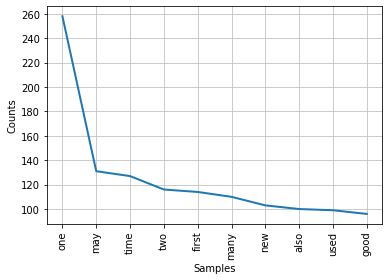

In [14]:
freqdist.plot(10)

Lexical diversity dispersion plot¶

In [15]:
def lexical_diversity(text):
    return round(len(set(text)) / len(text),2)

def get_brown_corpus_words(category, include_stop_words=False):
    '''helper method to get word array for a particular category
     of brown corpus which may/may not include the stopwords that can be toggled
     with the include_stop_words flag in the function parameter'''
    if include_stop_words:
        words = [word.lower() for word in brown.words(categories=category) if word.isalpha() ]
    else:
        words = [word.lower() for word in brown.words(categories=category)
                 if word.lower() not in stop_words and word.isalpha() ]
    return words

# calculate and print lexical diversity for each genre of the brown corpus
for genre in brown.categories():
    lex_div_with_stop = lexical_diversity(get_brown_corpus_words(genre, True))
    lex_div = lexical_diversity(get_brown_corpus_words(genre, False))
    print(f'{genre:<17}: \t {lex_div:<10} \t {lex_div_with_stop}')

adventure        : 	 0.26       	 0.13
belles_lettres   : 	 0.2        	 0.1
editorial        : 	 0.29       	 0.16
fiction          : 	 0.28       	 0.14
government       : 	 0.2        	 0.11
hobbies          : 	 0.25       	 0.13
humor            : 	 0.49       	 0.25
learned          : 	 0.16       	 0.09
lore             : 	 0.24       	 0.13
mystery          : 	 0.26       	 0.13
news             : 	 0.24       	 0.13
religion         : 	 0.32       	 0.16
reviews          : 	 0.39       	 0.21
romance          : 	 0.26       	 0.13
science_fiction  : 	 0.47       	 0.24


Word length distribution plot

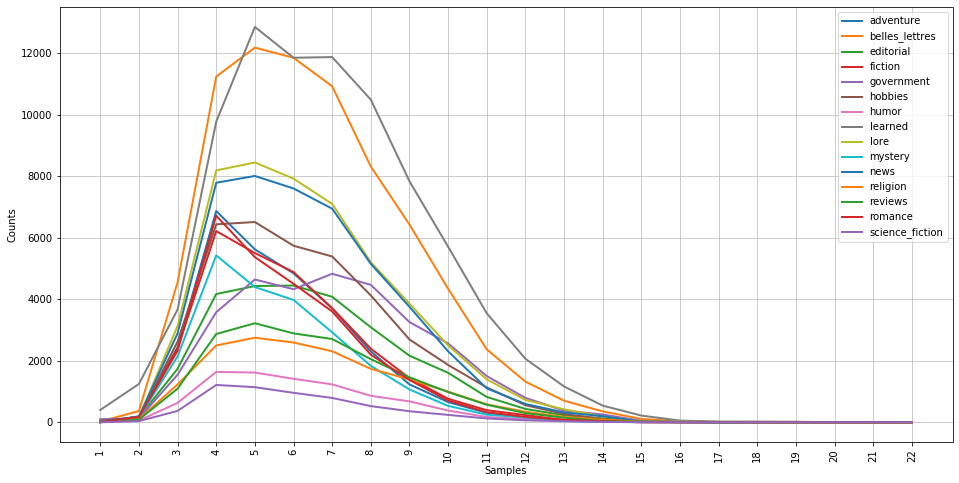

In [16]:
cfd = nltk.ConditionalFreqDist(
           (genre, len(word))
           for genre in brown.categories()
           for word in get_brown_corpus_words(genre))

plt.figure(figsize=(16,8))
cfd.plot()

N-gram frequency distribution plot

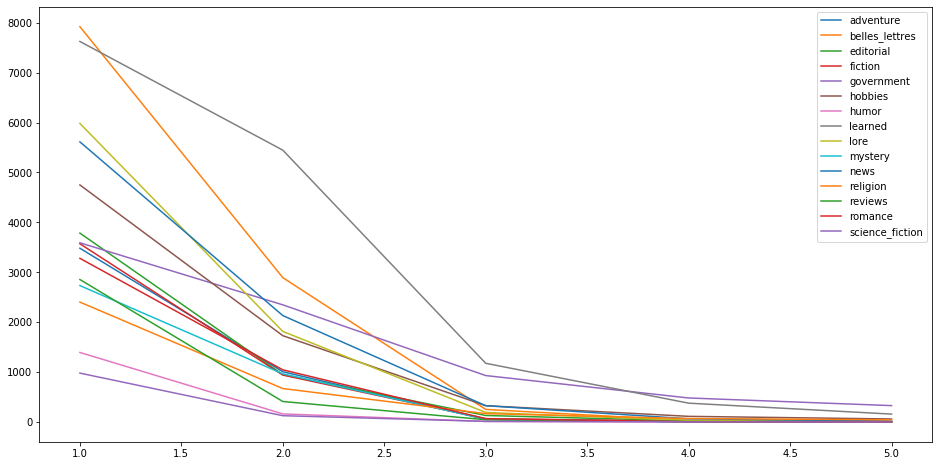

In [18]:
from nltk.util import ngrams
import numpy as np

plt.figure(figsize=(16,8))
for genre in brown.categories():
    sol = []
    for i in range(1,6):
        count = 0
        fdist = nltk.FreqDist(ngrams(get_brown_corpus_words(genre), i))
        sol.append(len([cnt for ng,cnt in fdist.most_common() if cnt > 1]))
    plt.plot(np.arange(1,6), sol, label=genre)
plt.legend()
plt.show()